# Content
- [Aims](#Aims)
- [Import Data](#Import-Data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Splitting](#Data-Splitting)
- [Models](#Model-1)
- [Forward Selection](#Forward-Selection)
- [Model Evaluation](#Model-Evaluation)
- [Problems](#Problems)
- [Further Work](#Further-Work)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Aims

Construct a linear regression model to interpret how variables affect the average price.

# Import Data

In [2]:
data = pd.read_csv('data/avocado.csv', index_col = 0)
data.shape

(18249, 13)

In [3]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory Data Analysis

In [5]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


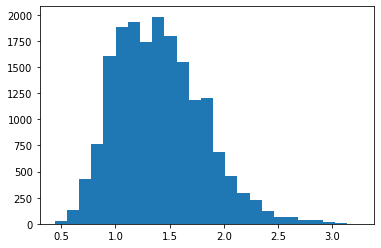

In [7]:
plt.hist(data['AveragePrice'], bins = 25)
plt.show()
# Seems bimodel

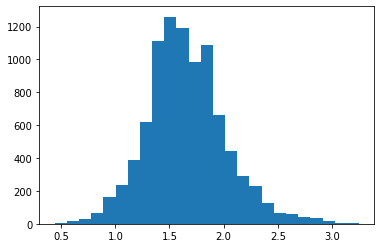

In [8]:
plt.hist(data[data['type'] == 'organic']['AveragePrice'], bins = 25)
plt.show()

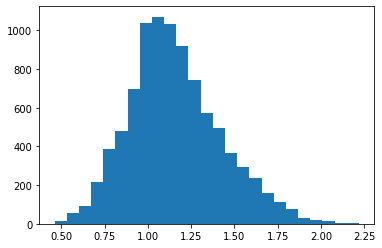

In [9]:
plt.hist(data[data['type'] == 'conventional']['AveragePrice'], bins = 25)
plt.show()
# Bimodel may be due to the two type

In [10]:
data.groupby('type').mean()['AveragePrice']
# Organic is average higher

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

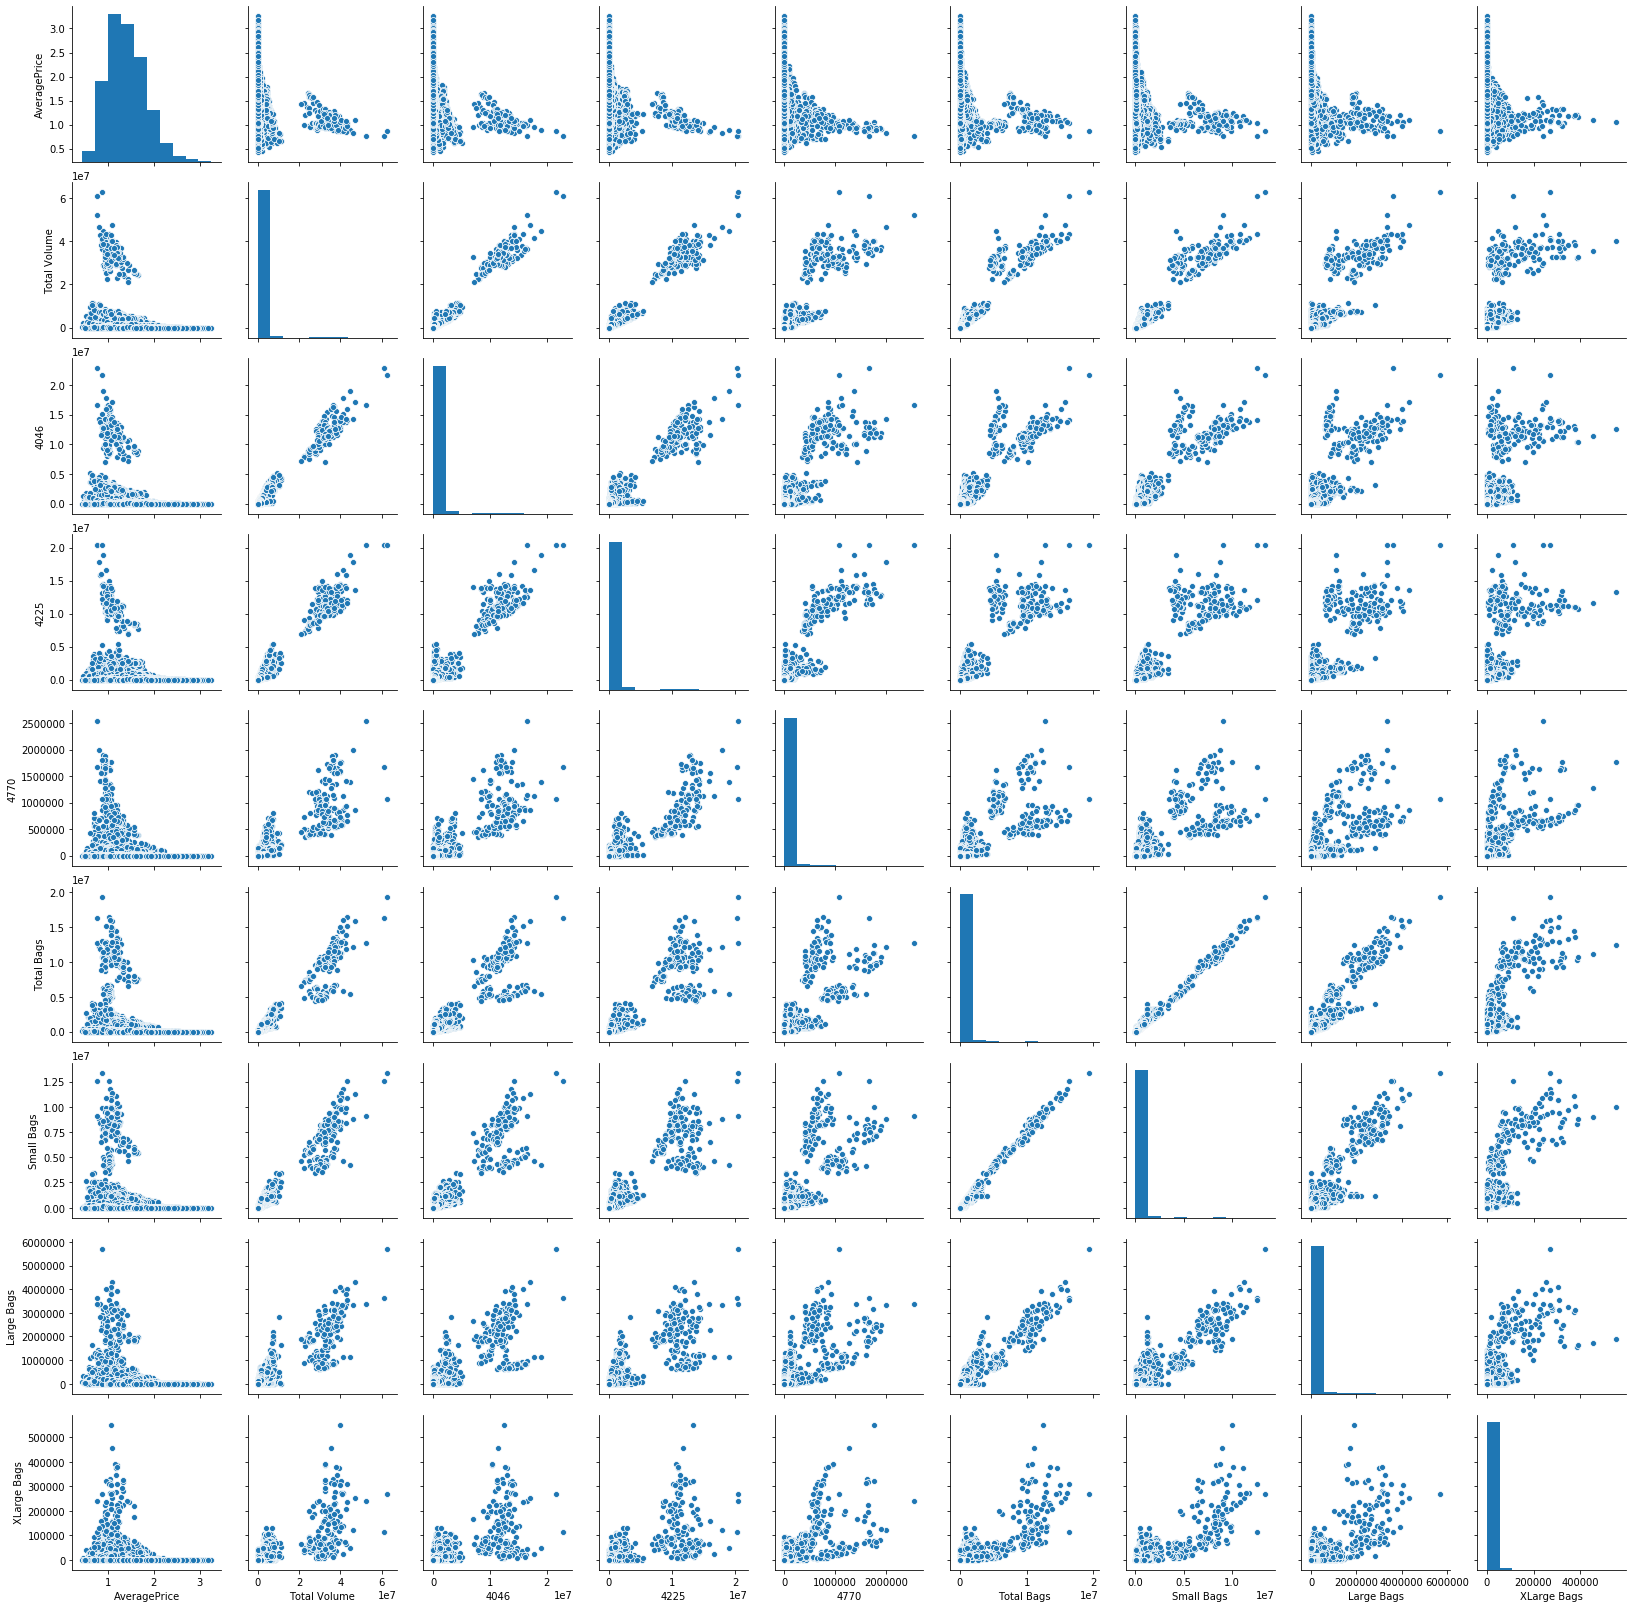

In [11]:
sns.pairplot(data.iloc[:, 1:10])
plt.show()

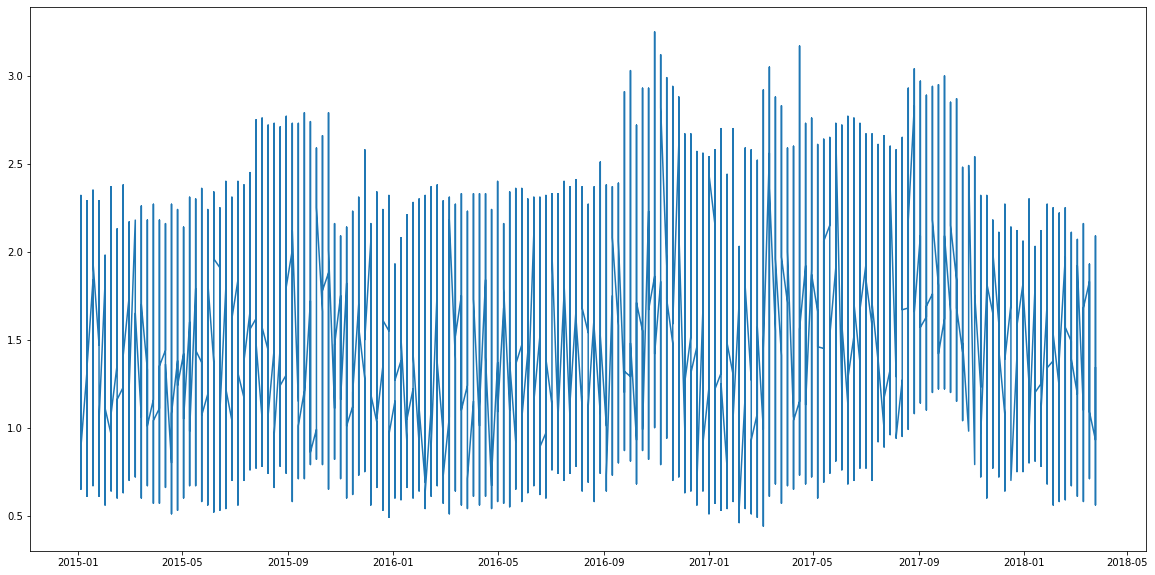

In [12]:
data_time = data[['Date', 'AveragePrice']]
data_time = data.sort_values('Date')

plt.figure(figsize = (20, 10))
plt.plot(data_time['Date'], data_time['AveragePrice'])
plt.show()

# Seem price in September to November is higher.

In [13]:
len(np.unique(data['region']))

54

In [14]:
data['region'].value_counts()

NewYork                338
SanFrancisco           338
Portland               338
Chicago                338
Orlando                338
Boise                  338
LasVegas               338
PhoenixTucson          338
Boston                 338
NewOrleansMobile       338
Detroit                338
Columbus               338
Tampa                  338
Plains                 338
Philadelphia           338
SouthCentral           338
Spokane                338
Albany                 338
GrandRapids            338
Pittsburgh             338
Roanoke                338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Louisville             338
StLouis                338
Midsouth               338
Denver                 338
West                   338
Atlanta                338
Jacksonville           338
Northeast              338
NorthernNewEngland     338
CincinnatiDayton       338
Indianapolis           338
BaltimoreWashington    338
Seattle                338
S

# Data Splitting

In [15]:
train, test = train_test_split(data, test_size = 0.2, random_state = 0)
train.shape, test.shape

((14599, 13), (3650, 13))

In [16]:
train, validate = train_test_split(train, test_size = 0.3, random_state = 0)
train.shape, validate.shape

((10219, 13), (4380, 13))

# Model 1

In [17]:
X = train[['Total Volume', 'Total Bags', 'type']]
y = train['AveragePrice']

In [18]:
df = pd.get_dummies(X['type']).drop('conventional', axis = 1)
X = pd.concat([X, df], axis = 1).drop('type', axis = 1)
X.head()

,Total Volume,Total Bags,organic
47,10657.65,3534.71,1
6,10754.39,6651.20,1
46,320492.68,183442.15,0
39,5611.76,210.41,1
27,545889.03,102279.18,0


In [19]:
model_1 = sm.OLS(y, sm.add_constant(X)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     2105.
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        23:02:11   Log-Likelihood:                -2658.1
No. Observations:               10219   AIC:                             5324.
Df Residuals:                   10215   BIC:                             5353.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1700      0.005    254.048      0.000       1.161       1.179
Total Volume -1.042e-08      3e-09     -3.470      0.001   -1.63e-08   -4.53e-09
Total Bags    1.566e-08   1.09e-08      1.440      0.150   -5.65e-09     3.7e-08
organic          0.4815      0.006     75.503      0.000       0.469       0.494
==============================================================================
Omnibus:                      500.620   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              797.697
Skew:                           0.422   Prob(JB):                    6.06e-174
Kurtosis:                       4.078   Cond. No.                     8.96e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model_fitted_y = model_1.fittedvalues
standardized_residuals = model_1.get_influence().resid_studentized_internal

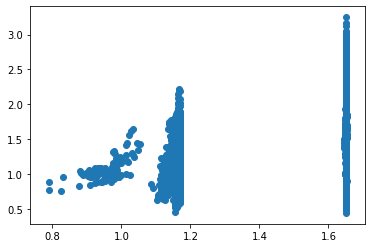

In [21]:
plt.scatter(model_fitted_y, y)
plt.show()

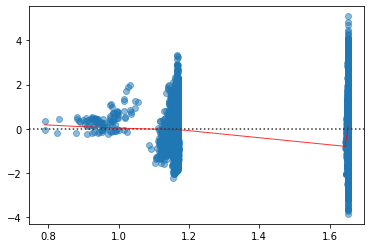

In [22]:
sns.residplot(model_fitted_y, standardized_residuals,
              lowess=True,
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()

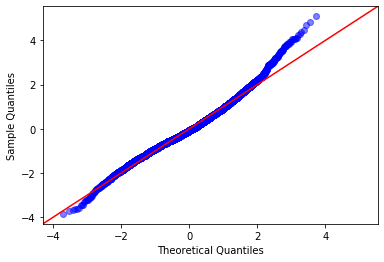

In [23]:
QQ = ProbPlot(standardized_residuals).qqplot(line='45', alpha=0.5, lw=1)
plt.show()

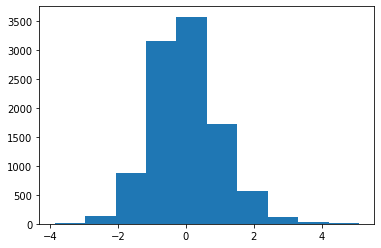

In [24]:
plt.hist(standardized_residuals)
plt.show()

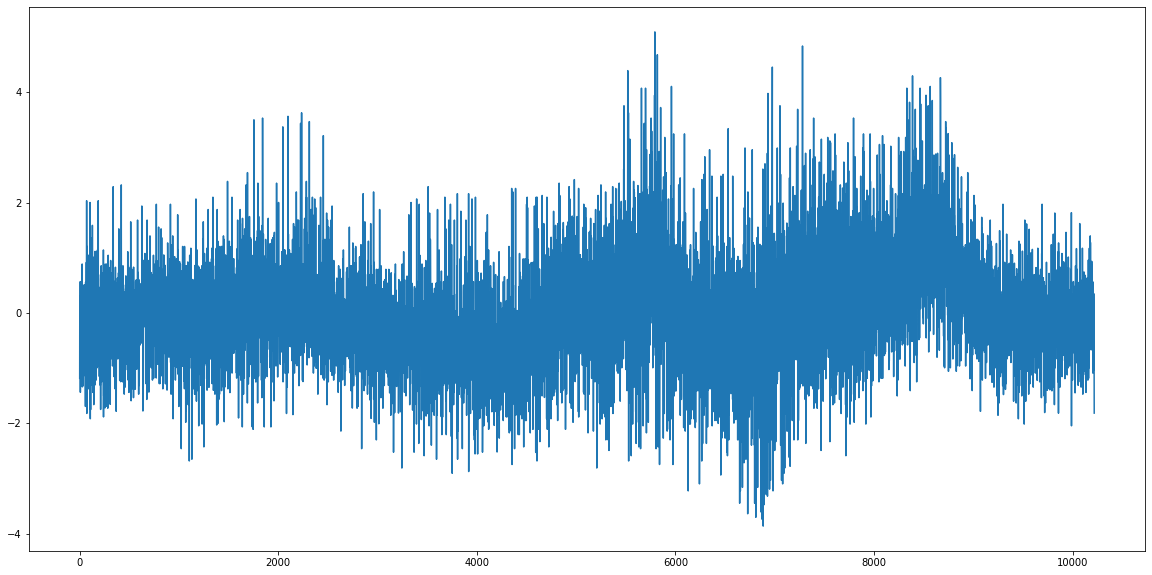

In [25]:
data_time = pd.DataFrame({'Date': train['Date'], 'Residual': standardized_residuals})
data_time = data_time.sort_values('Date')

plt.figure(figsize = (20, 10))
plt.plot(data_time['Residual'].values)
plt.show()
# Seems not random

# Model 2

In [26]:
(train['Total Volume'] <= 0).sum()

0

In [27]:
(train['Total Bags'] <= 0).sum()

7

In [28]:
(train['AveragePrice'] <= 0).sum()

0

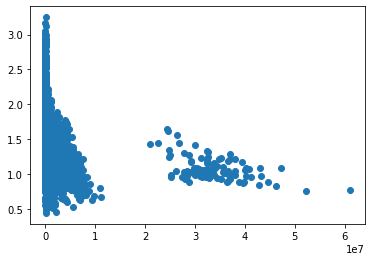

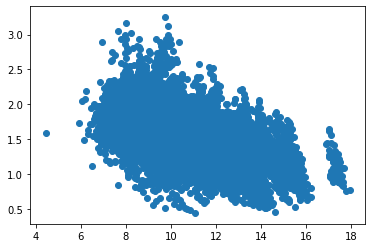

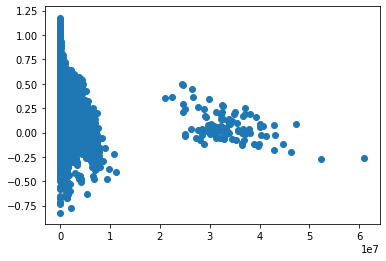

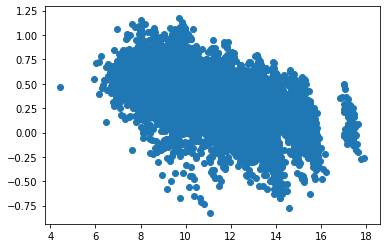

In [29]:
plt.scatter(X['Total Volume'], y)
plt.show()

plt.scatter(np.log(X['Total Volume']), y)
plt.show()

plt.scatter(X['Total Volume'], np.log(y))
plt.show()

plt.scatter(np.log(X['Total Volume']), np.log(y))
plt.show()

In [30]:
X['log_total_Volume'] = np.log(X['Total Volume'])
X = X.drop('Total Volume', axis = 1)

In [31]:
model_2 = sm.OLS(np.log(y), sm.add_constant(X)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     2352.
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        23:02:26   Log-Likelihood:                 893.46
No. Observations:               10219   AIC:                            -1779.
Df Residuals:                   10215   BIC:                            -1750.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6359      0.023     27.527      0.000       0.591       0.681
Total Bags        9.569e-09   2.58e-09      3.703      0.000     4.5e-09    1.46e-08
organic              0.2149      0.007     28.724      0.000       0.200       0.230
log_total_Volume    -0.0394      0.002    -22.116      0.000      -0.043      -0.036
==============================================================================
Omnibus:                      340.105   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              516.985
Skew:                          -0.325   Prob(JB):                    5.47e-113
Kurtosis:                       3.890   Cond. No.                     1.10e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
model_fitted_y = model_2.fittedvalues
standardized_residuals = model_2.get_influence().resid_studentized_internal

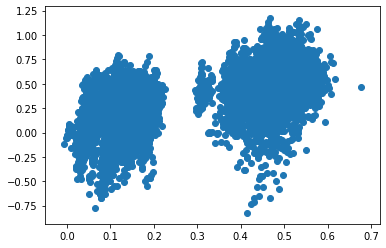

In [33]:
plt.scatter(model_fitted_y, np.log(y))
plt.show()

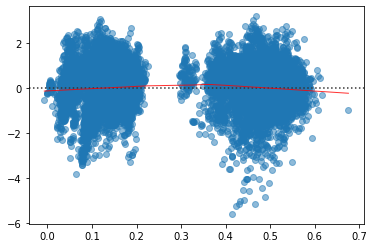

In [34]:
sns.residplot(model_fitted_y, standardized_residuals,
              lowess=True,
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()

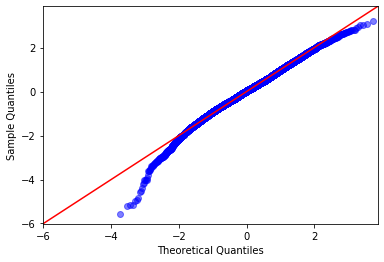

In [35]:
QQ = ProbPlot(standardized_residuals).qqplot(line='45', alpha=0.5, lw=1)
plt.show()

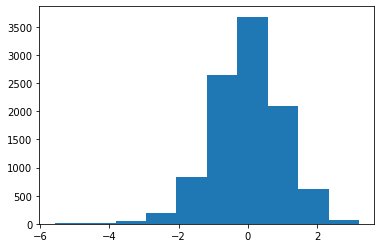

In [36]:
plt.hist(standardized_residuals)
plt.show()
# Left skewed

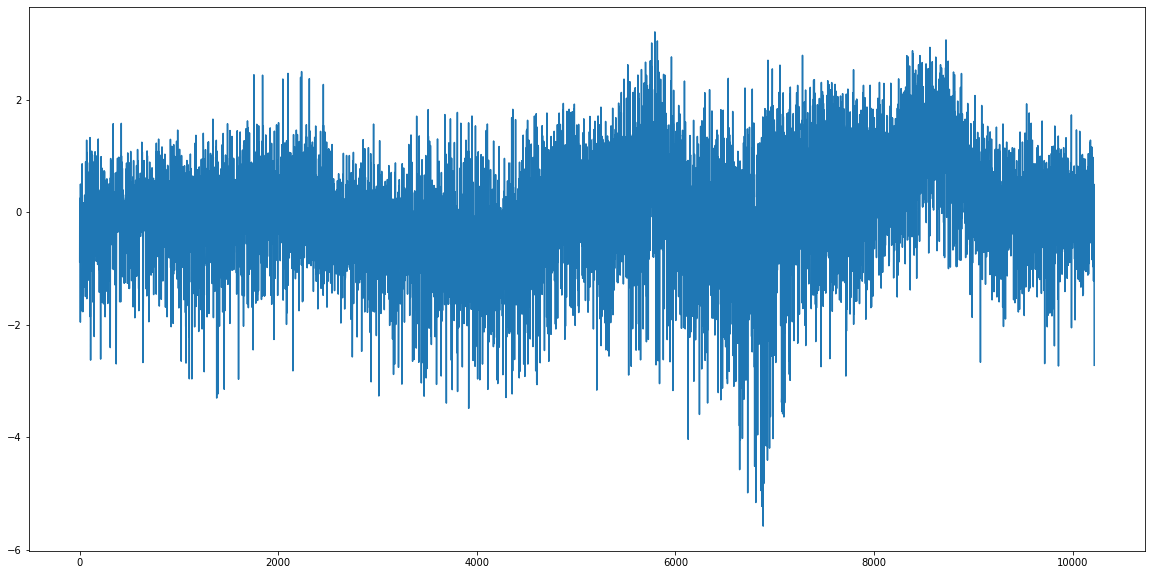

In [37]:
data_time = pd.DataFrame({'Date': train['Date'], 'Residual': standardized_residuals})
data_time = data_time.sort_values('Date')

plt.figure(figsize = (20, 10))
plt.plot(data_time['Residual'].values)
plt.show()

In [38]:
SSE = np.sum((y - np.exp(model_fitted_y))**2)
SST = np.sum((y - np.mean(y))**2)
1-(SSE/(X.shape[0] - X.shape[1] - 1))/(SST/(X.shape[0] - 1))

0.3972250772299458

# Model 3

In [39]:
X = train[['Total Volume', 'Total Bags','type', 'region']]
y = train['AveragePrice']

df = pd.get_dummies(X['type']).drop('conventional', axis = 1)
X = pd.concat([X, df], axis = 1).drop('type', axis = 1)

df = pd.get_dummies(X['region']).drop('Albany', axis = 1)
X = pd.concat([X, df], axis = 1).drop('region', axis = 1)

X['log_total_Volume'] = np.log(X['Total Volume'])
X = X.drop('Total Volume', axis = 1)

X.head()

,Total Bags,organic,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,...,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico,log_total_Volume
47,3534.71,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.274033
6,6651.20,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.283069
46,183442.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.677615
39,210.41,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,8.632620
27,102279.18,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.210171


In [40]:
model_3 = sm.OLS(np.log(y), sm.add_constant(X)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     318.1
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        23:02:40   Log-Likelihood:                 3384.8
No. Observations:               10219   AIC:                            -6656.
Df Residuals:                   10162   BIC:                            -6243.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.1428      0.043     49.467      0.000       2.058       2.228
Total Bags          -4.911e-09   2.54e-09     -1.937      0.053   -9.88e-09    5.93e-11
organic                -0.2578      0.014    -18.628      0.000      -0.285      -0.231
Atlanta                 0.1026      0.019      5.459      0.000       0.066       0.139
BaltimoreWashington     0.3603      0.020     18.444      0.000       0.322       0.399
Boise                  -0.1785      0.018    -10.010      0.000      -0.213      -0.144
Boston                  0.2694      0.019     14.396      0.000       0.233       0.306
BuffaloRochester        0.0633      0.018      3.534      0.000       0.028       0.098
California              0.5854      0.024     24.298      0.000       0.538       0.633
Charlotte               0.1625      0.018      8.904      0.000       0.127       0.198
Chicago                 0.3896      0.020     19.408      0.000       0.350       0.429
CincinnatiDayton       -0.0449      0.019     -2.418      0.016      -0.081      -0.008
Columbus               -0.0773      0.018     -4.211      0.000      -0.113      -0.041
DallasFtWorth           0.0252      0.020      1.270      0.204      -0.014       0.064
Denver                  0.1523      0.020      7.513      0.000       0.113       0.192
Detroit                 0.0763      0.019      4.071      0.000       0.040       0.113
GrandRapids             0.0195      0.018      1.091      0.275      -0.016       0.055
GreatLakes              0.4981      0.023     21.781      0.000       0.453       0.543
HarrisburgScranton      0.1535      0.018      8.430      0.000       0.118       0.189
HartfordSpringfield     0.3362      0.018     18.395      0.000       0.300       0.372
Houston                -0.0192      0.020     -0.968      0.333      -0.058       0.020
Indianapolis           -0.0636      0.018     -3.487      0.000      -0.099      -0.028
Jacksonville            0.0181      0.018      1.009      0.313      -0.017       0.053
LasVegas                0.0679      0.019      3.616      0.000       0.031       0.105
LosAngeles              0.3083      0.022     13.941      0.000       0.265       0.352
Louisville             -0.1891      0.018    -10.288      0.000      -0.225      -0.153
MiamiFtLauderdale       0.0788      0.018      4.283      0.000       0.043       0.115
Midsouth                0.5178      0.022     23.168      0.000       0.474       0.562
Nashville              -0.1020      0.018     -5.566      0.000      -0.138      -0.066
NewOrleansMobile       -0.0588      0.018     -3.252      0.001      -0.094      -0.023
NewYork                 0.5656      0.021     27.108      0.000       0.525       0.606
Northeast               0.6707      0.023     29.381      0.000       0.626       0.715
Nor

In [41]:
model_fitted_y = model_3.fittedvalues
standardized_residuals = model_3.get_influence().resid_studentized_internal

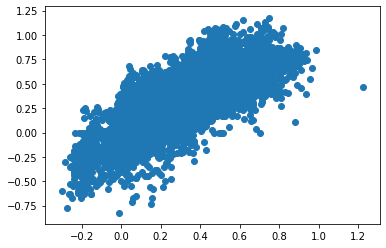

In [42]:
plt.scatter(model_fitted_y, np.log(y))
plt.show()

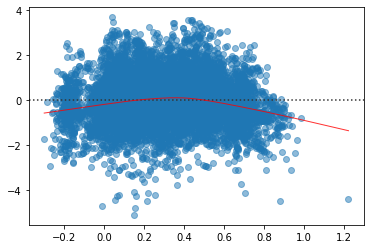

In [43]:
sns.residplot(model_fitted_y, standardized_residuals,
              lowess=True,
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()

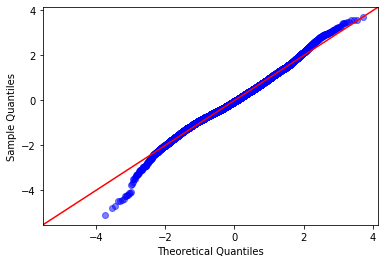

In [44]:
QQ = ProbPlot(standardized_residuals).qqplot(line='45', alpha=0.5, lw=1)
plt.show()

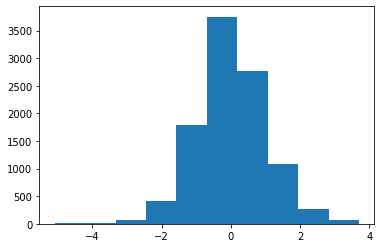

In [45]:
plt.hist(standardized_residuals)
plt.show()

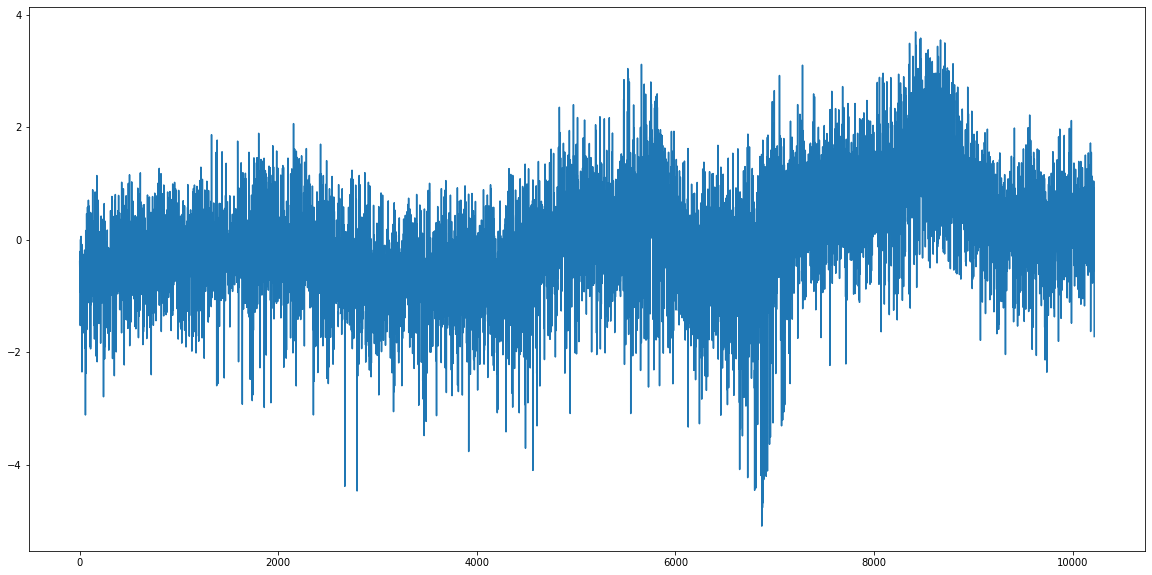

In [46]:
data_time = pd.DataFrame({'Date': train['Date'], 'Residual': standardized_residuals})
data_time = data_time.sort_values('Date')

plt.figure(figsize = (20, 10))
plt.plot(data_time['Residual'].values)
plt.show()

In [47]:
SSE = np.sum((y - np.exp(model_fitted_y))**2)
SST = np.sum((y - np.mean(y))**2)
1-(SSE/(X.shape[0] - X.shape[1] - 1))/(SST/(X.shape[0] - 1))

0.5909437982708419

# Model 4

In [48]:
X = train[['Total Volume', 'Total Bags', 'type', 'region']]
y = train['AveragePrice']

df = pd.get_dummies(X['type']).drop('conventional', axis = 1)
X = pd.concat([X, df], axis = 1).drop('type', axis = 1)

df = pd.get_dummies(X['region']).drop('Albany', axis = 1)
region_list = df.columns.tolist()
X = pd.concat([X, df], axis = 1).drop('region', axis = 1)

X['log_total_Volume'] = np.log(X['Total Volume'])
X = X.drop('Total Volume', axis = 1)

X['organic_log_total_Volume'] = X['organic'] * X['log_total_Volume']
X['organic_total_bags'] = X['organic'] * X['Total Bags']

for col in region_list:
    X[col+'_log_total_Volume'] = X[col] * X['log_total_Volume']
    X[col+'_total_bags'] = X[col] * X['Total Bags']

X.head()

,Total Bags,organic,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,...,Syracuse_log_total_Volume,Syracuse_total_bags,Tampa_log_total_Volume,Tampa_total_bags,TotalUS_log_total_Volume,TotalUS_total_bags,West_log_total_Volume,West_total_bags,WestTexNewMexico_log_total_Volume,WestTexNewMexico_total_bags
47,3534.71,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6651.20,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,183442.15,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,210.41,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,102279.18,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
model_4 = sm.OLS(np.log(y), sm.add_constant(X)).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     150.5
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        23:02:55   Log-Likelihood:                 4544.3
No. Observations:               10219   AIC:                            -8759.
Df Residuals:                   10054   BIC:                            -7565.
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    4.8725      0.167     29.213      0.000       4.546       5.199
Total Bags                            5.659e-06   2.57e-06      2.201      0.028    6.19e-07    1.07e-05
organic                                 -2.6155      0.124    -21.026      0.000      -2.859      -2.372
Atlanta                                 -0.1757      0.130     -1.353      0.176      -0.430       0.079
BaltimoreWashington                     -0.1802      0.241     -0.747      0.455      -0.653       0.293
Boise                                    0.2024      0.118      1.721      0.085      -0.028       0.433
Boston                                  -0.6545      0.161     -4.065      0.000      -0.970      -0.339
BuffaloRochester                        -0.4276      0.150     -2.843      0.004      -0.723      -0.133
California                              -0.9167      0.209     -4.393      0.000      -1.326      -0.508
Charlotte                                0.5488      0.143      3.831      0.000       0.268       0.830
Chicago                                 -0.3434      0.164     -2.090      0.037      -0.666      -0.021
CincinnatiDayton                         0.9036      0.166      5.429      0.000       0.577       1.230
Columbus                                 0.3766      0.135      2.796      0.005       0.113       0.641
DallasFtWorth                           -0.5952      0.144     -4.148      0.000      -0.876      -0.314
Denver                                  -0.5125      0.169     -3.025      0.002      -0.845      -0.180
Detroit                                  0.1425      0.152      0.938      0.348      -0.155       0.440
GrandRapids                             -0.4274      0.146     -2.924      0.003      -0.714      -0.141
GreatLakes                              -0.7079      0.220     -3.213      0.001      -1.140      -0.276
HarrisburgScranton                      -0.2477      0.174     -1.422      0.155      -0.589       0.094
HartfordSpringfield                      0.3551      0.164      2.163      0.031       0.033       0.677
Houston                                 -0.5880      0.134     -4.373      0.000      -0.852      -0.324
Indianapolis                            -0.3439      0.133     -2.583      0.010      -0.605      -0.083
Jacksonville                             0.0621      0.127      0.488      0.626      -0.187       0.312
LasVegas                                 0.7134      0.138      5.162      0.000       0.442       0.984
LosAngeles                              -1.1717      0.178     -6.587      0.000      -1.520      -0.823
Louisville                               0.2097      0.141      1.493      0.136      -0.066       0.485
MiamiFtLauderdale                     

In [50]:
model_fitted_y = model_4.fittedvalues
standardized_residuals = model_4.get_influence().resid_studentized_internal

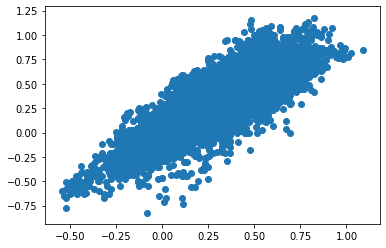

In [51]:
plt.scatter(model_fitted_y, np.log(y))
plt.show()

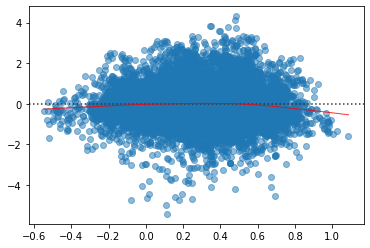

In [52]:
sns.residplot(model_fitted_y, standardized_residuals,
              lowess=True,
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()

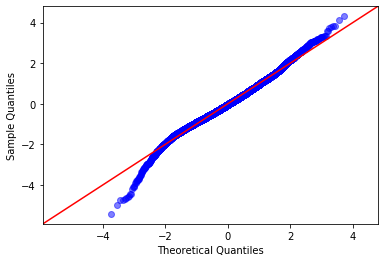

In [53]:
QQ = ProbPlot(standardized_residuals).qqplot(line='45', alpha=0.5, lw=1)
plt.show()

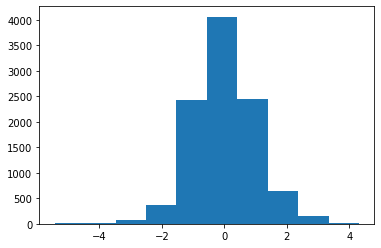

In [54]:
plt.hist(standardized_residuals)
plt.show()

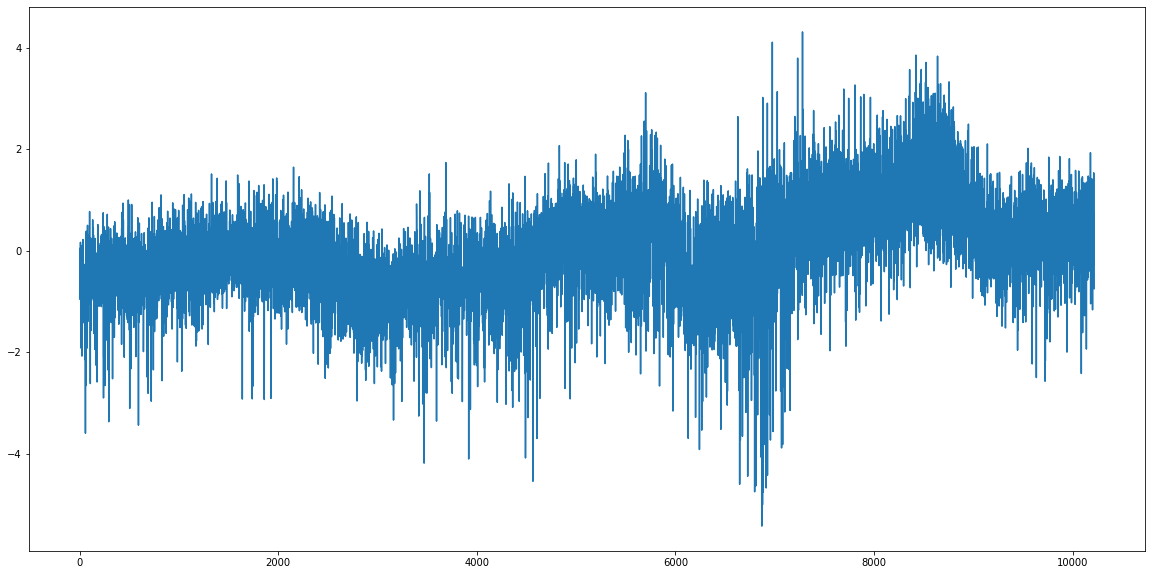

In [55]:
data_time = pd.DataFrame({'Date': train['Date'], 'Residual': standardized_residuals})
data_time = data_time.sort_values('Date')

plt.figure(figsize = (20, 10))
plt.plot(data_time['Residual'].values)
plt.show()

In [56]:
SSE = np.sum((y - np.exp(model_fitted_y))**2)
SST = np.sum((y - np.mean(y))**2)
1-(SSE/(X.shape[0] - X.shape[1] - 1))/(SST/(X.shape[0] - 1))

0.6648155146438051

# Model Selection

In [57]:
def forward_selection(X, y, criteria = 'pvalue', validate_X = None, validate_y = None, alpha = 0.05, metric = 'adj_r2'):
    if criteria == 'pvalue':
        selected_list = []
        remaining_list = X.columns.tolist().copy()
        ssr_min = np.inf
        selected = None
        p_value = None
        for i in range(X.shape[1]):
            for col in remaining_list:
                cols = selected_list.copy()
                cols.append(col)
                lm = sm.OLS(y, sm.add_constant(X[cols])).fit()
                if ssr_min > lm.ssr:
                    ssr_min = lm.ssr
                    selected = col
                    p_value = lm.pvalues[col]
            
            if p_value < alpha:
                selected_list.append(selected)
                remaining_list.remove(selected)
                
            else:
                return selected_list
                
        return selected_list
    
    if criteria == 'metrics':
        selected_list = []
        remaining_list = X.columns.tolist().copy()
        ssr_min = np.inf
        selected = None
        if metric == 'adj_r2':
            prev_value = -np.inf
        else:
            prev_value = np.inf
        curr_value = None
        for i in range(X.shape[1]):
            for col in remaining_list:
                cols = selected_list.copy()
                cols.append(col)
                lm = sm.OLS(y, sm.add_constant(X[cols])).fit()
                if ssr_min > lm.ssr:
                    ssr_min = lm.ssr
                    selected = col
                    if metric == 'adj_r2':
                        curr_value = lm.rsquared_adj
                    elif metric == 'aic':
                        curr_value = lm.aic
                    elif metric == 'bic':
                        curr_value = lm.bic
                    else:
                        print('No such metric')
                        return
                    
            if metric == 'adj_r2':
                if prev_value < curr_value:
                    selected_list.append(selected)
                    remaining_list.remove(selected)
                    prev_value = curr_value
                else:
                    return selected_list
            
            else:
                if prev_value > curr_value:
                    selected_list.append(selected)
                    remaining_list.remove(selected)
                    prev_value = curr_value
                else:
                    return selected_list
                
        return selected_list
    
    if criteria == 'validate':
        selected_list = []
        remaining_list = X.columns.tolist().copy()
        ssr_min = np.inf
        selected = None
        prev_mse = np.inf
        curr_mse = None
        for i in range(X.shape[1]):
            for col in remaining_list:
                cols = selected_list.copy()
                cols.append(col)
                lm = sm.OLS(y, sm.add_constant(X[cols])).fit()
                if ssr_min > lm.ssr:
                    ssr_min = lm.ssr
                    selected = col
                    p_value = lm.pvalues[col]
            
            cols = selected_list.copy()
            cols.append(selected)
            lm = sm.OLS(y, sm.add_constant(X[cols])).fit()
            curr_mse = mean_squared_error(validate_y, lm.predict(sm.add_constant(validate_X[cols])))
            if prev_mse > curr_mse:
                selected_list.append(selected)
                remaining_list.remove(selected)
                prev_mse = curr_mse
                
            else:
                return selected_list
                
        return selected_list       

In [58]:
forward_p = forward_selection(X, np.log(y))

In [59]:
model_p = sm.OLS(np.log(y), sm.add_constant(X[forward_p])).fit()
model_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     208.8
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        23:18:31   Log-Likelihood:                 4490.4
No. Observations:               10219   AIC:                            -8745.
Df Residuals:                   10101   BIC:                            -7891.
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    3.9712      0.084     47.192      0.000       3.806       4.136
organic                                 -2.0520      0.075    -27.422      0.000      -2.199      -1.905
log_total_Volume                        -0.3195      0.007    -44.205      0.000      -0.334      -0.305
PhoenixTucson_total_bags              4.097e-07    1.3e-07      3.144      0.002    1.54e-07    6.65e-07
Houston_log_total_Volume                 0.0125      0.002      6.382      0.000       0.009       0.016
SanFrancisco                             1.4692      0.189      7.782      0.000       1.099       1.839
NewYork                                  0.3476      0.080      4.348      0.000       0.191       0.504
HartfordSpringfield                      0.8031      0.067     11.956      0.000       0.671       0.935
Northeast                                0.1435      0.088      1.632      0.103      -0.029       0.316
DallasFtWorth_log_total_Volume           0.0306      0.006      5.251      0.000       0.019       0.042
Philadelphia_log_total_Volume            0.0444      0.002     19.703      0.000       0.040       0.049
WestTexNewMexico_total_bags           3.727e-07   1.66e-07      2.243      0.025    4.71e-08    6.98e-07
CincinnatiDayton_log_total_Volume       -0.1130      0.014     -7.825      0.000      -0.141      -0.085
Nashville                                0.3129      0.077      4.037      0.000       0.161       0.465
SouthCentral_log_total_Volume            0.0422      0.002     21.650      0.000       0.038       0.046
Boise_total_bags                     -2.574e-06   8.81e-07     -2.923      0.003    -4.3e-06   -8.48e-07
Louisville                               0.4462      0.117      3.797      0.000       0.216       0.676
Columbus_log_total_Volume               -0.0682      0.012     -5.898      0.000      -0.091      -0.046
Roanoke                                  0.9205      0.157      5.874      0.000       0.613       1.228
LosAngeles_total_bags                -2.739e-07   3.61e-08     -7.583      0.000   -3.45e-07   -2.03e-07
Portland_total_bags                   -2.56e-07   1.26e-07     -2.026      0.043   -5.04e-07   -8.33e-09
NewOrleansMobile                        -0.4017      0.133     -3.023      0.003      -0.662      -0.141
Spokane_total_bags                   -1.783e-06   8.85e-07     -2.014      0.044   -3.52e-06   -4.77e-08
LasVegas_total_bags                   4.721e-07   3.19e-07      1.480      0.139   -1.53e-07     1.1e-06
TotalUS                                 -0.9142      0.217     -4.208      0.000      -1.340      -0.488
Indianapolis                            -0.0109      0.016     -0.664      0.507      -0.043       0.021
RichmondNorfolk                       

In [60]:
forward_adj_r2 = forward_selection(X, np.log(y), criteria = 'metrics')

In [61]:
model_adj_r2 = sm.OLS(np.log(y), sm.add_constant(X[forward_adj_r2])).fit()
model_adj_r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     169.0
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        23:38:18   Log-Likelihood:                 4536.7
No. Observations:               10219   AIC:                            -8779.
Df Residuals:                   10072   BIC:                            -7716.
Df Model:                         146                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    4.6138      0.133     34.589      0.000       4.352       4.875
organic                                 -2.5791      0.116    -22.219      0.000      -2.807      -2.352
log_total_Volume                        -0.3763      0.012    -32.078      0.000      -0.399      -0.353
PhoenixTucson_total_bags              3.931e-07   1.33e-07      2.951      0.003    1.32e-07    6.54e-07
Houston_log_total_Volume                 0.0500      0.010      4.846      0.000       0.030       0.070
SanFrancisco                             1.2094      0.194      6.238      0.000       0.829       1.589
NewYork                                  0.0558      0.102      0.546      0.585      -0.144       0.256
HartfordSpringfield                      0.6541      0.074      8.841      0.000       0.509       0.799
Northeast                               -0.3773      0.209     -1.803      0.071      -0.788       0.033
DallasFtWorth_log_total_Volume           0.0600      0.008      7.302      0.000       0.044       0.076
Philadelphia_log_total_Volume            0.0456      0.002     19.905      0.000       0.041       0.050
WestTexNewMexico_total_bags           3.799e-07   1.68e-07      2.255      0.024    4.96e-08     7.1e-07
CincinnatiDayton_log_total_Volume       -0.1003      0.015     -6.809      0.000      -0.129      -0.071
Nashville                                0.3789      0.120      3.160      0.002       0.144       0.614
SouthCentral_log_total_Volume            0.1110      0.014      8.021      0.000       0.084       0.138
Boise_total_bags                     -2.154e-06   8.82e-07     -2.442      0.015   -3.88e-06   -4.25e-07
Louisville                               0.4232      0.119      3.546      0.000       0.189       0.657
Columbus_log_total_Volume               -0.0604      0.012     -5.115      0.000      -0.084      -0.037
Roanoke                                  0.8877      0.158      5.629      0.000       0.579       1.197
LosAngeles_total_bags                -3.059e-07   4.63e-08     -6.601      0.000   -3.97e-07   -2.15e-07
Portland_total_bags                  -2.405e-07    1.3e-07     -1.853      0.064   -4.95e-07    1.39e-08
NewOrleansMobile                        -0.4873      0.135     -3.614      0.000      -0.752      -0.223
Spokane_total_bags                   -1.338e-06   8.87e-07     -1.509      0.131   -3.08e-06       4e-07
LasVegas_total_bags                   5.155e-07    3.2e-07      1.612      0.107   -1.12e-07    1.14e-06
TotalUS                                 -1.6757      0.258     -6.498      0.000      -2.181      -1.170
Indianapolis                            -0.1462      0.069     -2.114      0.035      -0.282      -0.011
RichmondNorfolk                       

In [62]:
forward_aic = forward_selection(X, np.log(y), criteria = 'metrics', metric = 'aic')

In [63]:
model_aic = sm.OLS(np.log(y), sm.add_constant(X[forward_aic])).fit()
model_aic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     200.5
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        23:56:01   Log-Likelihood:                 4497.9
No. Observations:               10219   AIC:                            -8750.
Df Residuals:                   10096   BIC:                            -7860.
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    4.0461      0.087     46.740      0.000       3.876       4.216
organic                                 -2.1169      0.077    -27.496      0.000      -2.268      -1.966
log_total_Volume                        -0.3258      0.007    -43.884      0.000      -0.340      -0.311
PhoenixTucson_total_bags              4.032e-07    1.3e-07      3.093      0.002    1.48e-07    6.59e-07
Houston_log_total_Volume                 0.0129      0.002      6.544      0.000       0.009       0.017
SanFrancisco                             1.4482      0.189      7.667      0.000       1.078       1.818
NewYork                                  0.3273      0.080      4.070      0.000       0.170       0.485
HartfordSpringfield                      0.7952      0.067     11.786      0.000       0.663       0.927
Northeast                                0.1221      0.089      1.365      0.172      -0.053       0.297
DallasFtWorth_log_total_Volume           0.0327      0.006      5.578      0.000       0.021       0.044
Philadelphia_log_total_Volume            0.0445      0.002     19.649      0.000       0.040       0.049
WestTexNewMexico_total_bags           3.688e-07   1.66e-07      2.220      0.026    4.31e-08    6.94e-07
CincinnatiDayton_log_total_Volume       -0.1129      0.014     -7.811      0.000      -0.141      -0.085
Nashville                                0.4550      0.118      3.854      0.000       0.224       0.686
SouthCentral_log_total_Volume            0.0427      0.002     21.521      0.000       0.039       0.047
Boise_total_bags                     -2.525e-06    8.8e-07     -2.868      0.004   -4.25e-06      -8e-07
Louisville                               0.4521      0.118      3.842      0.000       0.221       0.683
Columbus_log_total_Volume               -0.0684      0.012     -5.919      0.000      -0.091      -0.046
Roanoke                                  0.9280      0.157      5.917      0.000       0.621       1.235
LosAngeles_total_bags                -2.823e-07   3.65e-08     -7.729      0.000   -3.54e-07   -2.11e-07
Portland_total_bags                  -2.583e-07   1.26e-07     -2.043      0.041   -5.06e-07   -1.05e-08
NewOrleansMobile                        -0.4041      0.133     -3.039      0.002      -0.665      -0.143
Spokane_total_bags                    -1.73e-06   8.85e-07     -1.955      0.051   -3.47e-06    4.37e-09
LasVegas_total_bags                   4.726e-07   3.19e-07      1.482      0.138   -1.53e-07     1.1e-06
TotalUS                                 -1.0124      0.219     -4.626      0.000      -1.441      -0.583
Indianapolis                            -0.0112      0.016     -0.679      0.497      -0.043       0.021
RichmondNorfolk                       

In [64]:
forward_bic = forward_selection(X, np.log(y), criteria = 'metrics', metric = 'bic')

In [65]:
model_bic = sm.OLS(np.log(y), sm.add_constant(X[forward_bic])).fit()
model_bic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     253.2
Date:                Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                        00:09:00   Log-Likelihood:                 4388.1
No. Observations:               10219   AIC:                            -8586.
Df Residuals:                   10124   BIC:                            -7899.
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    3.5111      0.071     49.229      0.000       3.371       3.651
organic                                 -1.5445      0.058    -26.532      0.000      -1.659      -1.430
log_total_Volume                        -0.2793      0.006    -45.727      0.000      -0.291      -0.267
PhoenixTucson_total_bags              4.407e-07   1.31e-07      3.359      0.001    1.84e-07    6.98e-07
Houston_log_total_Volume                 0.0096      0.002      6.366      0.000       0.007       0.013
SanFrancisco                             1.4993      0.190      7.892      0.000       1.127       1.872
NewYork                                  0.3915      0.080      4.918      0.000       0.235       0.548
HartfordSpringfield                      0.7346      0.067     11.001      0.000       0.604       0.865
Northeast                                0.2339      0.086      2.713      0.007       0.065       0.403
DallasFtWorth_log_total_Volume           0.0134      0.002      8.832      0.000       0.010       0.016
Philadelphia_log_total_Volume            0.0351      0.001     24.478      0.000       0.032       0.038
WestTexNewMexico_total_bags           3.837e-07   1.67e-07      2.291      0.022    5.55e-08    7.12e-07
CincinnatiDayton_log_total_Volume       -0.1047      0.015     -7.208      0.000      -0.133      -0.076
Nashville                                0.1989      0.077      2.584      0.010       0.048       0.350
SouthCentral_log_total_Volume            0.0368      0.002     21.146      0.000       0.033       0.040
Boise_total_bags                     -4.641e-06   6.56e-07     -7.071      0.000   -5.93e-06   -3.35e-06
Louisville                               0.0433      0.067      0.645      0.519      -0.088       0.175
Columbus_log_total_Volume               -0.0414      0.007     -5.670      0.000      -0.056      -0.027
Roanoke                                  0.3924      0.089      4.428      0.000       0.219       0.566
LosAngeles_total_bags                -1.666e-07   2.31e-08     -7.222      0.000   -2.12e-07   -1.21e-07
Portland_total_bags                  -5.311e-07   7.05e-08     -7.533      0.000   -6.69e-07   -3.93e-07
NewOrleansMobile                        -0.2206      0.057     -3.903      0.000      -0.331      -0.110
Spokane_total_bags                   -5.622e-06   4.33e-07    -12.998      0.000   -6.47e-06   -4.77e-06
LasVegas_total_bags                   4.486e-07   3.22e-07      1.394      0.163   -1.82e-07    1.08e-06
TotalUS                                 -0.2884      0.208     -1.384      0.167      -0.697       0.120
Indianapolis                            -0.0467      0.015     -3.108      0.002      -0.076      -0.017
RichmondNorfolk                       

In [66]:
validate_X = validate[['Total Volume', 'Total Bags', 'type', 'region']]
validate_y = validate['AveragePrice']

df = pd.get_dummies(validate_X['type']).drop('conventional', axis = 1)
validate_X = pd.concat([validate_X, df], axis = 1).drop('type', axis = 1)

df = pd.get_dummies(validate_X['region']).drop('Albany', axis = 1)
validate_X = pd.concat([validate_X, df], axis = 1).drop('region', axis = 1)

validate_X['log_total_Volume'] = np.log(validate_X['Total Volume'])
validate_X = validate_X.drop('Total Volume', axis = 1)

validate_X['organic_log_total_Volume'] = validate_X['organic'] * validate_X['log_total_Volume']
validate_X['organic_total_bags'] = validate_X['organic'] * validate_X['Total Bags']

for col in region_list:
    validate_X[col+'_log_total_Volume'] = validate_X[col] * validate_X['log_total_Volume']
    validate_X[col+'_total_bags'] = validate_X[col] * validate_X['Total Bags']

validate_X.head()

,Total Bags,organic,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,...,Syracuse_log_total_Volume,Syracuse_total_bags,Tampa_log_total_Volume,Tampa_total_bags,TotalUS_log_total_Volume,TotalUS_total_bags,West_log_total_Volume,West_total_bags,WestTexNewMexico_log_total_Volume,WestTexNewMexico_total_bags
14,721471.88,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0
11,7218.83,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0
39,4276.24,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0
45,23901.18,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0
51,8911429.39,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,17.456829,8911429.39,0.0,0.0,0.0,0.0


In [67]:
forward_validate = forward_selection(X, np.log(y), criteria = 'validate', validate_X = validate_X, validate_y = np.log(validate_y))

In [68]:
model_validate = sm.OLS(np.log(y), sm.add_constant(X[forward_validate])).fit()
model_validate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     315.8
Date:                Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                        00:16:52   Log-Likelihood:                 4168.2
No. Observations:               10219   AIC:                            -8192.
Df Residuals:                   10147   BIC:                            -7672.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    2.9260      0.058     50.717      0.000       2.813       3.039
organic                                 -1.1078      0.044    -25.247      0.000      -1.194      -1.022
log_total_Volume                        -0.2231      0.005    -47.120      0.000      -0.232      -0.214
PhoenixTucson_total_bags              4.773e-07   1.33e-07      3.577      0.000    2.16e-07    7.39e-07
Houston_log_total_Volume                -0.0035      0.001     -2.976      0.003      -0.006      -0.001
SanFrancisco                             0.4543      0.014     32.759      0.000       0.427       0.481
NewYork                                  0.5387      0.015     35.172      0.000       0.509       0.569
HartfordSpringfield                      0.6909      0.068     10.229      0.000       0.558       0.823
Northeast                                0.1912      0.086      2.223      0.026       0.023       0.360
DallasFtWorth_log_total_Volume           0.0002      0.001      0.156      0.876      -0.002       0.003
Philadelphia_log_total_Volume            0.0241      0.001     20.762      0.000       0.022       0.026
WestTexNewMexico_total_bags           4.149e-07   1.71e-07      2.432      0.015    8.04e-08    7.49e-07
CincinnatiDayton_log_total_Volume       -0.0636      0.008     -7.707      0.000      -0.080      -0.047
Nashville                               -0.1706      0.013    -13.296      0.000      -0.196      -0.145
SouthCentral_log_total_Volume            0.0225      0.001     16.740      0.000       0.020       0.025
Boise_total_bags                     -4.129e-06   6.65e-07     -6.208      0.000   -5.43e-06   -2.82e-06
Louisville                              -0.2713      0.013    -20.148      0.000      -0.298      -0.245
Columbus_log_total_Volume               -0.0149      0.001    -12.079      0.000      -0.017      -0.012
Roanoke                                 -0.1516      0.013    -11.386      0.000      -0.178      -0.125
LosAngeles_total_bags                -1.323e-07    2.2e-08     -6.000      0.000   -1.75e-07    -8.9e-08
Portland_total_bags                  -5.592e-07   7.15e-08     -7.819      0.000   -6.99e-07   -4.19e-07
NewOrleansMobile                        -0.1142      0.013     -9.010      0.000      -0.139      -0.089
Spokane_total_bags                   -6.881e-06   4.05e-07    -17.000      0.000   -7.67e-06   -6.09e-06
LasVegas_total_bags                   4.504e-07   3.28e-07      1.372      0.170   -1.93e-07    1.09e-06
TotalUS                                  0.7561      0.025     30.593      0.000       0.708       0.805
Indianapolis                            -0.1316      0.013    -10.135      0.000      -0.157      -0.106
RichmondNorfolk                       

In [69]:
test_X = test[['Total Volume', 'Total Bags', 'type', 'region']]
test_y = test['AveragePrice']

df = pd.get_dummies(test_X['type']).drop('conventional', axis = 1)
test_X = pd.concat([test_X, df], axis = 1).drop('type', axis = 1)

df = pd.get_dummies(test_X['region']).drop('Albany', axis = 1)
test_X = pd.concat([test_X, df], axis = 1).drop('region', axis = 1)

test_X['log_total_Volume'] = np.log(test_X['Total Volume'])
test_X = test_X.drop('Total Volume', axis = 1)

test_X['organic_log_total_Volume'] = test_X['organic'] * test_X['log_total_Volume']
test_X['organic_total_bags'] = test_X['organic'] * test_X['Total Bags']

for col in region_list:
    test_X[col+'_log_total_Volume'] = test_X[col] * test_X['log_total_Volume']
    test_X[col+'_total_bags'] = test_X[col] * test_X['Total Bags']

test_X.head()

,Total Bags,organic,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,...,Syracuse_log_total_Volume,Syracuse_total_bags,Tampa_log_total_Volume,Tampa_total_bags,TotalUS_log_total_Volume,TotalUS_total_bags,West_log_total_Volume,West_total_bags,WestTexNewMexico_log_total_Volume,WestTexNewMexico_total_bags
3,1305.74,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.00
25,52872.97,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.00
40,578257.49,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,13.859958,578257.49,0.0,0.0,0.000000,0.00
16,5339.26,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.00
10,10969.54,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,9.693089,10969.54


In [70]:
print('Full model:', mean_squared_error(np.log(test_y), model_4.predict(sm.add_constant(test_X))))
print('p-value model:', mean_squared_error(np.log(test_y), model_p.predict(sm.add_constant(test_X[forward_p]))))
print('adjusted R2 model:', mean_squared_error(np.log(test_y), model_adj_r2.predict(sm.add_constant(test_X[forward_adj_r2]))))
print('aic model:', mean_squared_error(np.log(test_y), model_aic.predict(sm.add_constant(test_X[forward_aic]))))
print('bic model:', mean_squared_error(np.log(test_y), model_bic.predict(sm.add_constant(test_X[forward_bic]))))
print('validate model:', mean_squared_error(np.log(test_y), model_validate.predict(sm.add_constant(test_X[forward_validate]))))

Full model: 0.026519899467251928
p-value model: 0.026837978705165064
adjusted R2 model: 0.02657814743737348
aic model: 0.026770676074325143
bic model: 0.0272448125370179
validate model: 0.028318926853402874


In [71]:
print('Train data:', mean_squared_error(np.log(y), model_4.predict(sm.add_constant(X))))
print('Validate data:', mean_squared_error(np.log(validate_y), model_4.predict(sm.add_constant(validate_X))))
print('Test data:', mean_squared_error(np.log(test_y), model_4.predict(sm.add_constant(test_X))))
# A bit inconsistence

Train data: 0.024058525027077757
Validate data: 0.025978086859368515
Test data: 0.026519899467251928


# Model Evaluation

In [72]:
X = data[['Total Volume', 'Total Bags', 'type', 'region']]
y = data['AveragePrice']

df = pd.get_dummies(X['type']).drop('conventional', axis = 1)
X = pd.concat([X, df], axis = 1).drop('type', axis = 1)

df = pd.get_dummies(X['region']).drop('Albany', axis = 1)
region_list = df.columns.tolist()
X = pd.concat([X, df], axis = 1).drop('region', axis = 1)

X['log_total_Volume'] = np.log(X['Total Volume'])
X = X.drop('Total Volume', axis = 1)

X['organic_log_total_Volume'] = X['organic'] * X['log_total_Volume']
X['organic_total_bags'] = X['organic'] * X['Total Bags']

for col in region_list:
    X[col+'_log_total_Volume'] = X[col] * X['log_total_Volume']
    X[col+'_total_bags'] = X[col] * X['Total Bags']

X.head()

,Total Bags,organic,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,...,Syracuse_log_total_Volume,Syracuse_total_bags,Tampa_log_total_Volume,Tampa_total_bags,TotalUS_log_total_Volume,TotalUS_total_bags,West_log_total_Volume,West_total_bags,WestTexNewMexico_log_total_Volume,WestTexNewMexico_total_bags
0,8696.87,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9505.56,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8145.35,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5811.16,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6183.95,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(sm.add_constant(X).values, i) for i in range(X.shape[1] + 1)]
vif['feature'] = sm.add_constant(X).columns
vif.drop(0).sort_values('vif', ascending = False)

,vif,feature
1,3.294383e+06,Total Bags
160,2.942224e+06,TotalUS_total_bags
162,1.578285e+05,West_total_bags
70,7.422164e+04,California_total_bags
148,6.675885e+04,SouthCentral_total_bags
150,3.798627e+04,Southeast_total_bags
116,3.791812e+04,Northeast_total_bags
102,3.606632e+04,LosAngeles_total_bags
88,3.495370e+04,GreatLakes_total_bags
108,2.634223e+04,Midsouth_total_bags


In [74]:
model = sm.OLS(np.log(y), sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     262.0
Date:                Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                        00:18:20   Log-Likelihood:                 7818.9
No. Observations:               18249   AIC:                        -1.531e+04
Df Residuals:                   18084   BIC:                        -1.402e+04
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    4.8239      0.126     38.152      0.000       4.576       5.072
Total Bags                              5.1e-06   2.16e-06      2.364      0.018    8.71e-07    9.33e-06
organic                                 -2.5970      0.094    -27.763      0.000      -2.780      -2.414
Atlanta                                 -0.1968      0.100     -1.967      0.049      -0.393      -0.001
BaltimoreWashington                     -0.3463      0.170     -2.041      0.041      -0.679      -0.014
Boise                                    0.2079      0.090      2.323      0.020       0.032       0.383
Boston                                  -0.5857      0.127     -4.628      0.000      -0.834      -0.338
BuffaloRochester                        -0.3556      0.112     -3.168      0.002      -0.576      -0.136
California                              -1.0927      0.156     -6.983      0.000      -1.399      -0.786
Charlotte                                0.6061      0.113      5.382      0.000       0.385       0.827
Chicago                                 -0.3467      0.133     -2.604      0.009      -0.608      -0.086
CincinnatiDayton                         0.7515      0.126      5.974      0.000       0.505       0.998
Columbus                                 0.3796      0.104      3.663      0.000       0.176       0.583
DallasFtWorth                           -0.5411      0.107     -5.049      0.000      -0.751      -0.331
Denver                                  -0.5450      0.128     -4.249      0.000      -0.796      -0.294
Detroit                                  0.0057      0.115      0.050      0.960      -0.220       0.232
GrandRapids                             -0.4549      0.112     -4.077      0.000      -0.674      -0.236
GreatLakes                              -0.7300      0.171     -4.276      0.000      -1.065      -0.395
HarrisburgScranton                      -0.2717      0.132     -2.059      0.039      -0.530      -0.013
HartfordSpringfield                      0.2049      0.130      1.573      0.116      -0.050       0.460
Houston                                 -0.6572      0.101     -6.511      0.000      -0.855      -0.459
Indianapolis                            -0.3167      0.102     -3.113      0.002      -0.516      -0.117
Jacksonville                             0.0690      0.100      0.691      0.490      -0.127       0.265
LasVegas                                 0.7428      0.105      7.077      0.000       0.537       0.949
LosAngeles                              -1.0531      0.133     -7.889      0.000      -1.315      -0.791
Louisville                               0.2034      0.104      1.958      0.050      -0.000       0.407
MiamiFtLauderdale                     

In [75]:
model_fitted_y = model.fittedvalues
standardized_residuals = model.get_influence().resid_studentized_internal

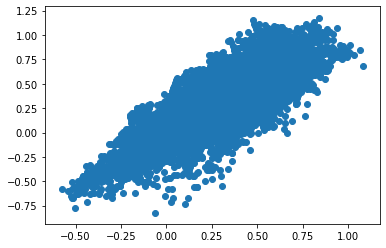

In [76]:
plt.scatter(model_fitted_y, np.log(y))
plt.show()

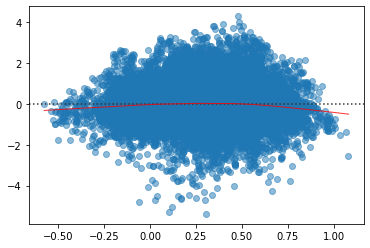

In [77]:
sns.residplot(model_fitted_y, standardized_residuals,
              lowess=True,
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()

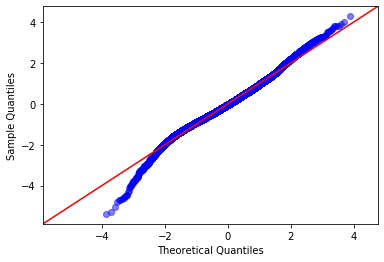

In [78]:
QQ = ProbPlot(standardized_residuals).qqplot(line='45', alpha=0.5, lw=1)
plt.show()

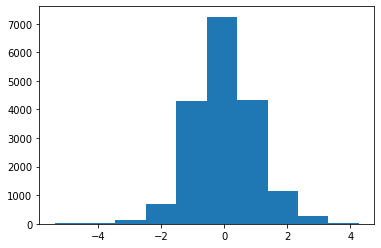

In [79]:
plt.hist(standardized_residuals)
plt.show()

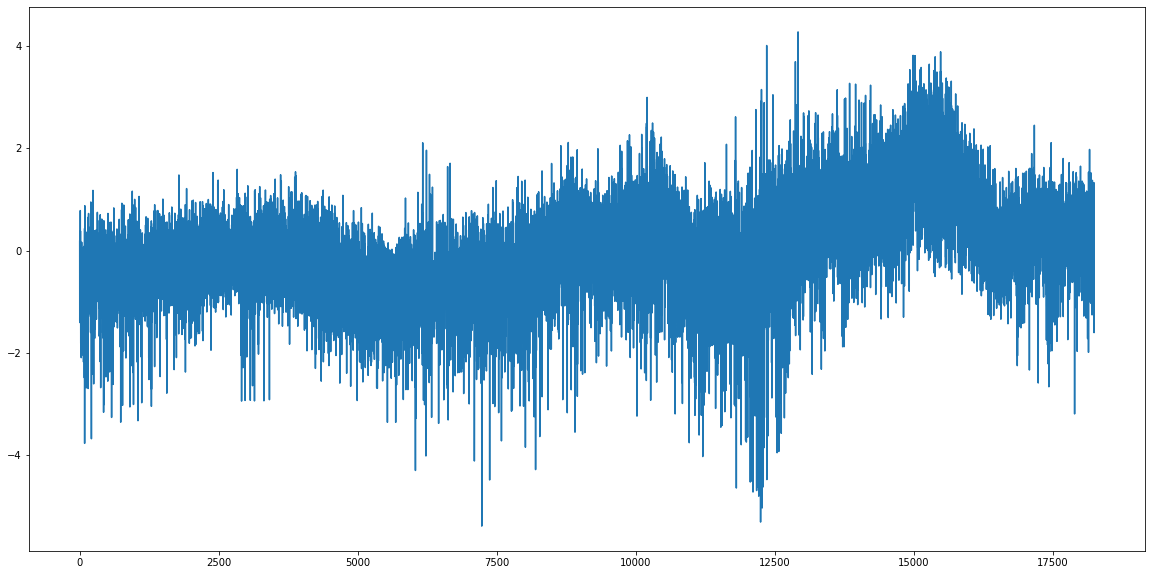

In [80]:
data_time = pd.DataFrame({'Date': data['Date'], 'Residual': standardized_residuals})
data_time = data_time.sort_values('Date')

plt.figure(figsize = (20, 10))
plt.plot(data_time['Residual'].values)
plt.show()

In [81]:
SSE = np.sum((y - np.exp(model_fitted_y))**2)
SST = np.sum((y - np.mean(y))**2)
1-(SSE/(X.shape[0] - X.shape[1] - 1))/(SST/(X.shape[0] - 1))

0.6579230519797602

In [82]:
np.sqrt(SSE/(X.shape[0] - X.shape[1] - 1))


0.2355148246995454

# Problems

1. The multicollinearity problem is serious as most of the vif are much greater than 10. We cannot interpret the t-ratio, p-values and confidence interval of the coefficients.
2. There is heteroscedasticity as the points in the middle value of predicted y are much scattered. We also cannot interpret the confidence interval and prediction interval.
3. The performance of the model is a bit inconsistence.

# Further Work

1. Possible features:  
    1.1 We can observe that the average price from September to November is higher. We can try to create a dummy variable indicating this effect.  
    1.2 Also, the average price seems increasing from 2015 to 2018. We can try to add the date into the model.
2. Different selection method:
    2.1 This notebook only uses forward selection. We can try backward selection or stepwise selection to see if they can select a better subset which minimizes the above problem.
3. Time series model:
    3.1 As the average price is increasing from time, we can try to construct time series model so as to fit the pattern better.